# Chronic Kidney Disease - Identifying risk factors and potential CKD subtypes

Chronic kidney disease, also called chronic kidney failure, involves a gradual loss of kidney function. Your kidneys filter wastes and excess fluids from your blood, which are then removed in your urine. Advanced chronic kidney disease can cause dangerous levels of fluid, electrolytes and wastes to build up in your body.For this project, Chronic Kidney Disease dataset in UCI Machine learning repository has been explored, which includes 24 attributes excluding the target label class and health parameters of 400 patients.



## Getting to know the Data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


 
Attribute list is ['age' 'bp' 'sg' 'al' 'su' 'rbc' 'pc' 'pcc' 'ba' 'bgr' 'bu' 'sc' 'sod'
 'pot' 'hemo' 'pcv' 'wbcc' 'rbcc' 'htn' 'dm' 'cad' 'appet' 'pe' 'ane'
 'class']
 
 
Number of people detected with chronic kidney disease: 250
Number of people not detected with chronic kidney diesease: 150


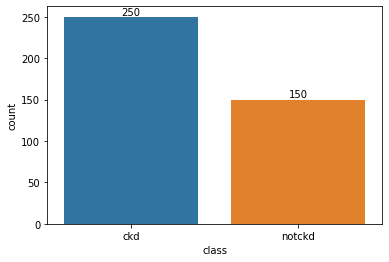

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns

#used Weka to convert .arff to .csv

data = pd.read_csv('/Users/gopalika14/Desktop/chronic_kidney_disease.csv',sep=',', na_values=['?'])
display(data.head())
print (" ")
print ("Attribute list is {}".format(data.columns.values))

print (" ")
#No of people with chronic kidney disease
num_ckd = len(data[data['class']=='ckd'])

#No of people without chronic kidney disease
num_notckd = len(data[data['class']=='notckd'])

#Visualising the class
ax=sns.countplot(x="class", data=data)
for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), xy=(p.get_x()+p.get_width()/2, p.get_height()),
            xytext=(0, 5), textcoords='offset points', ha="center", va="center");

print(" ")
print ("Number of people detected with chronic kidney disease: {}".format(num_ckd))
print ("Number of people not detected with chronic kidney diesease: {}".format(num_notckd))



In [2]:
#getting the distribution of the numerical attibutes of the dataset
display(data.describe())

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


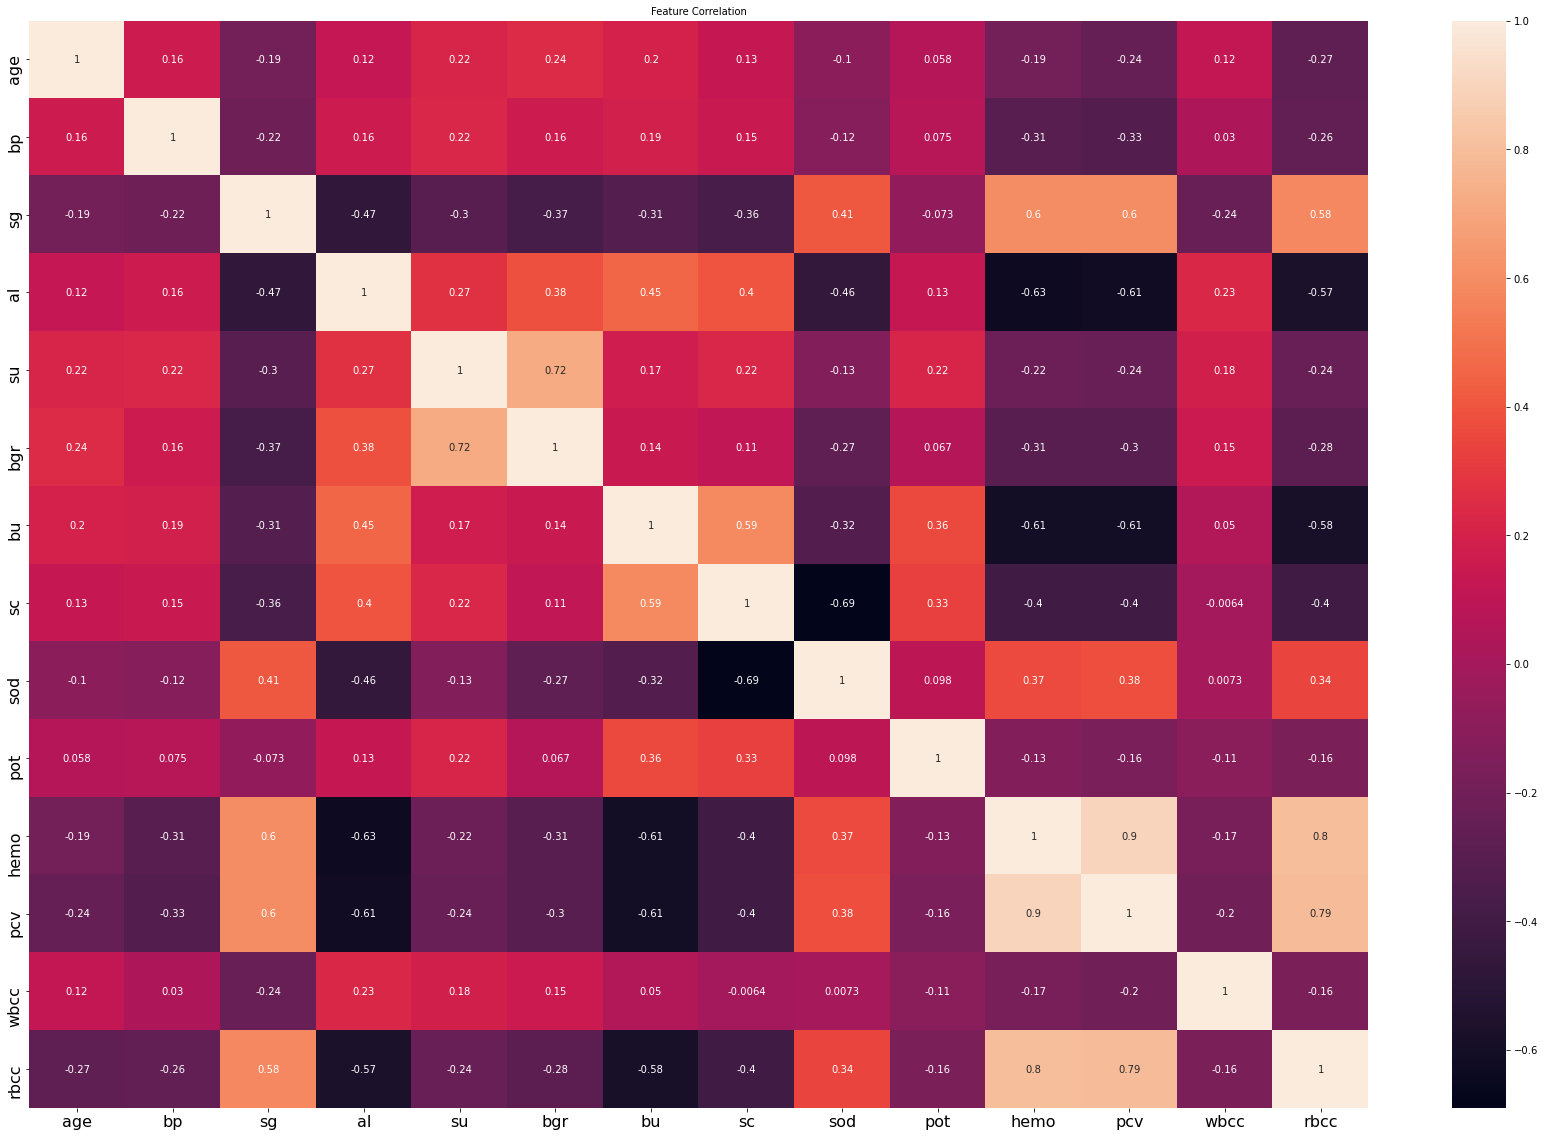

In [3]:
#plotting the heatmap to establish correlation between attributes 
plt.figure(figsize=(30,20))
ax = sns.heatmap(data.corr(), annot=True)
ax.set_title('Feature Correlation',fontsize=10)
ax.yaxis.set_tick_params(labelsize= 16)
ax.xaxis.set_tick_params(labelsize= 16)
plt.show()

#### OBSERVATION 1: We have 24 feature attributes with 11 numerical attributes and 14 nominal and one target label.The number of people detected with chronic kidney disease(ckd) is 250 and with no-ckd is 150. In the correlation plot, hemo,pcv and rbcc shows high positive correlation with each other followed by su,bgr which are also in the high end of positive correlation.

## Pre-Processing the Data

In [4]:
# checking null values within the dataset
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [5]:
#Replacing missing values with most frequent value for nominal features and median for numerical features
X = pd.DataFrame(data)
fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].median() for c in X],
        index=X.columns)
clean_data=X.fillna(fill) 
clean_data.head()            

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
#checking if the null values has been replaced
clean_data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [7]:
#Using Label Encoder to encode nominal values
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df=clean_data.copy()
for items in df:
    if df[items].dtype == np.dtype('O'):
        df[items]=le.fit_transform(df[items])

print(df.dtypes)
print(df)

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object
      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...   pcv    wbcc  \
0    48.0  80.0  1.020  1.0  0.0    1   1    0   0  121.0  ...  44.0  7800.0   
1     7.0  50.0  1.020  4.0  0.0    1   1    0   0  121.0  ...  38.0  6000.0   
2    62.0  80.0  1.010  2.0  3.0    1   1    0   0  423.0  ...  31.0  7500.0   
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  32.0  6700.0   
4    51.0  80.0  1.010  2.0  0.0    1   1    0   0  106.0  ...  35.0  7300.0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...     ...   
3

In [8]:
#Let's Scale the features for uniformity
from sklearn.preprocessing import StandardScaler, RobustScaler
target_class = df['class']
features = df.drop('class', axis = 1)
data_robust = pd.DataFrame(RobustScaler().fit_transform(features), columns=features.columns)

### In order to identify the risk factors for the CKD I plan to run a classification model so I can identify the risks through feature importance as it helps us identify which features contributed heavily towards the classification of CKD, hence it identifies the risk factors.

In [9]:
# For the purpose of classification I chose Random Forest Model, this can be altered to any preferred model of choice.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(data_robust,target_class, test_size=0.25, random_state=42)

In [10]:
clf=RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())

score = clf.score(X_train, y_train)
print('Train',score) 

score = clf.score(X_test,y_test)
print('Test',score) 

importances = clf.feature_importances_
print(importances)
print(sum(importances))
sort = sorted(importances, reverse=True)
print(sort)

Train 1.0
Test 1.0
[0.01739574 0.01271946 0.10902609 0.06932707 0.00407866 0.0032529
 0.00576341 0.         0.00051381 0.03252614 0.02337785 0.10800746
 0.02638491 0.01037286 0.17516335 0.17914063 0.00699248 0.09540907
 0.04950276 0.05043695 0.         0.01204831 0.00573878 0.00282134]
1.0
[0.17914062789340268, 0.17516334518884194, 0.1090260869049017, 0.10800745884682195, 0.09540906863981682, 0.0693270657887762, 0.050436951761606764, 0.04950275834145594, 0.03252614282840496, 0.02638490709215323, 0.023377850908826884, 0.017395735883451714, 0.012719464289388584, 0.01204831119580269, 0.01037285520055244, 0.006992478296211203, 0.005763407937262816, 0.005738777689063098, 0.004078656067084273, 0.0032528969461811936, 0.0028213411456122217, 0.0005138111543807947, 0.0, 0.0]


In [12]:
#Testing
y_pred = clf.predict(X_test)
print("Precision score:")
print(round(precision_score(y_test, y_pred, average='binary'), 3))
print("\nAccuracy score:")
print(round(accuracy_score(y_test, y_pred), 4))
#cm = confusion_matrix(y_test, y_pred)
#print(cm)

Precision score:
1.0

Accuracy score:
1.0


## Identifying Risk factors

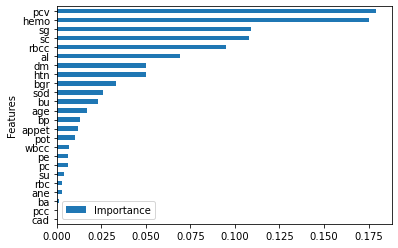

In [13]:
# The following feature importance plot shows the features that are heavily inclined towards the classification of CKD, hence it identifies the risk factors. 
rf_fi = pd.DataFrame({'Features':data_robust.columns,'Importance':np.round(clf.feature_importances_,3)}).sort_values('Importance',ascending=True)
rf_fi.plot(x='Features',y='Importance',kind='barh');


In [14]:
#calculating feature importance value
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

In [15]:
feature_names = data_robust.columns
print(feature_names)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')


In [16]:
# Feature Ranking represents the value assigned to each feature hence demonstrating their importance towards CKD classification
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature pcv (0.179141)
2. feature hemo (0.175163)
3. feature sg (0.109026)
4. feature sc (0.108007)
5. feature rbcc (0.095409)
6. feature al (0.069327)
7. feature dm (0.050437)
8. feature htn (0.049503)
9. feature bgr (0.032526)
10. feature sod (0.026385)
11. feature bu (0.023378)
12. feature age (0.017396)
13. feature bp (0.012719)
14. feature appet (0.012048)
15. feature pot (0.010373)
16. feature wbcc (0.006992)
17. feature pc (0.005763)
18. feature pe (0.005739)
19. feature su (0.004079)
20. feature rbc (0.003253)
21. feature ane (0.002821)
22. feature ba (0.000514)
23. feature pcc (0.000000)
24. feature cad (0.000000)


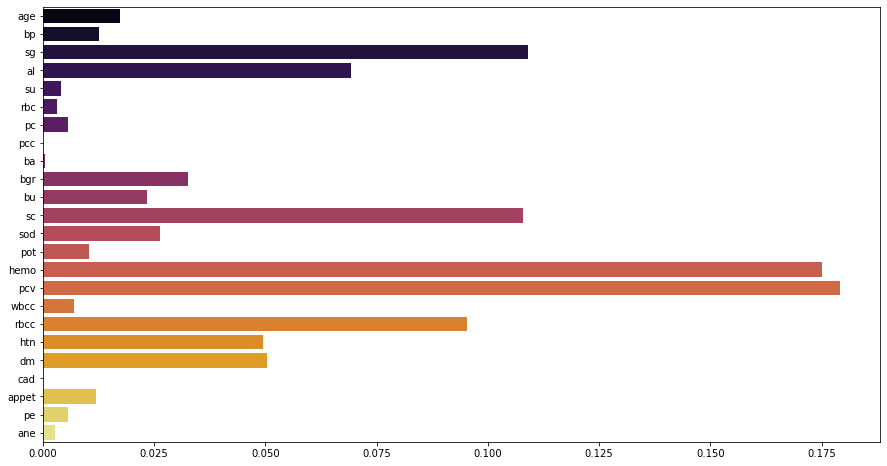

In [17]:
#Plotting the rankings in a pretty plot
plt.subplots(figsize=(15,8))
sns.barplot(importances, feature_names, palette='inferno')


### Observation 2: The main risk factors are identified by plotting the feature importance graph with respect to the classification algorithm as it suggest which features highly influenced the CK disease in a patient. 

### The top risk factors are, haemoglobin,packed cell volume,serum cretinine,red blood cells count and sugar as they have high feature importance value.

## Identifying Potential CKD subtypes

In [19]:
X = data_robust
y = target_class
print('Shape of X:', X.shape, '\n', 'Shape of y:', y.shape)
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

Shape of X: (400, 24) 
 Shape of y: (400,)


In [22]:
#Running Principal component analysis on all the features to reduce the dimensionality of the large data set, by transforming the variables into a smaller one that still contains most of the information. 
from sklearn.decomposition import PCA
pca = PCA(n_components=24, svd_solver='randomized').fit(X)
print(pca.components_)
print (" ")
print(pca.explained_variance_)

[[ 3.16699789e-02  6.54031995e-02 -6.43964020e-02  4.46478357e-02
   6.41274105e-02 -9.70008384e-03 -2.83952365e-02  6.96365513e-03
   4.42662996e-03  6.21078199e-02  2.43032531e-01  5.76355136e-01
  -1.45839321e-01  7.28455303e-01 -7.26189090e-02 -8.48116403e-02
  -7.26536860e-03 -1.41313806e-01  3.80611096e-02  3.16578465e-02
   1.24640741e-02  1.57174002e-02  2.13509081e-02  2.60120747e-02]
 [-2.85603253e-02 -5.49005653e-02  7.14393746e-02 -3.25996437e-02
   1.78728920e-03  1.81518539e-02  1.23324613e-02 -1.23287413e-02
  -6.78597653e-03 -4.84037221e-02 -1.26481545e-01 -6.21355857e-01
   3.19084704e-01  6.67061659e-01  7.77501872e-02  8.38494488e-02
  -2.96197200e-02  1.37037310e-01 -4.58790858e-02 -3.49778892e-02
  -1.86517074e-02 -2.84718822e-02 -2.04754092e-02 -2.17414629e-02]
 [-1.07384251e-01 -2.32467152e-01  2.99638925e-01 -1.61596327e-01
  -2.94186239e-01  3.64304638e-02  7.84127082e-02 -5.17982837e-02
  -2.50267416e-02 -5.48869968e-01 -1.16055929e-01  3.40624735e-01
  -1.003

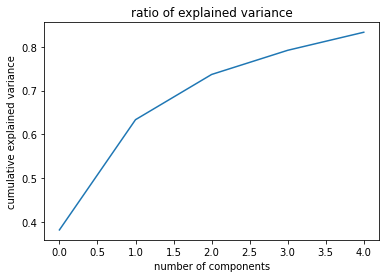

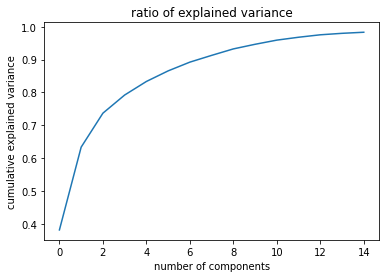

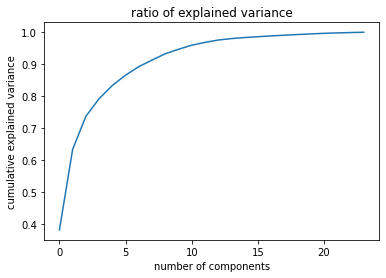

In [23]:
n_components = [5,15,24]
for k in n_components:
    pca = PCA(n_components= k, svd_solver='randomized').fit(X)
    f,ax = plt.subplots()
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title("ratio of explained variance")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

In [24]:
#checking for the number of principal components needed to retain 95% of the variance
cumsum = np.cumsum(pca.explained_variance_ratio_)
dimensions = np.argmax(cumsum >= 0.95) + 1
dimensions

11

In order to cluster data, we need to determine how to tell if two data points are similar. A proximity measure characterizes the similarity or dissimilarity that exists between objects.
We can choose to determine if two points are similar. So if the value is large, the points are very similar. Or choose to determine if they are dissimilar. If the value is small, the points are similar. This is what we know as "distance".There are various distances that a clustering algorithm can use: Manhattan distance, Minkowski distance, Euclidean distance, among others.


K-means typically uses Euclidean distance to determine how similar (or dissimilar) two points are.

First, we need to fix the numbers of clusters to use.The Elbow method looks at how the total WSS varies with the number of clusters.  For that, we'll compute k-means for a range of different values of k. Then, we calculate the total WSS. We plot the curve WSS vs. number of clusters.  Finally, we locate the elbow or bend of the plot. This point is considered to be the appropriate number of clusters.

### For our solution I am running unsupervised clustering on patient's baseline characteristics among 400 participants to identify novel CKD subgroups that best represent the data pattern.

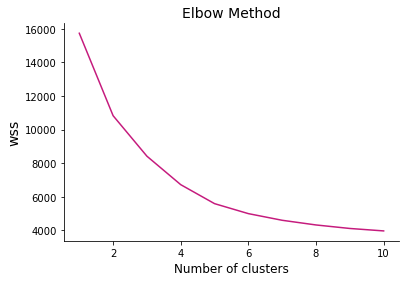

In [25]:
from sklearn.cluster import KMeans
wss = []
#choosing 11 features we got through PCA analysis
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wss.append(km.inertia_)
plt.plot(range(1,11),wss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wss', size=14)
plt.show() 

### The elbow of the plot is 5, this point is considered to be the appropriate number of clusters.

In [26]:
#running k-means on 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)
# Fit and predict 
label = kmeans.fit_predict(X)

In [27]:
#Labels for the kmeans cluster
print(label)

[0 0 3 3 3 3 1 3 3 1 3 3 3 3 3 1 0 3 3 3 3 4 1 0 3 3 3 3 3 3 1 3 3 3 3 3 3
 3 3 3 3 0 3 1 3 3 0 0 3 3 3 3 3 3 3 3 1 1 3 3 3 2 0 3 3 0 3 3 3 0 3 3 3 1
 1 0 1 3 3 3 3 3 0 0 1 3 3 3 3 0 3 3 3 3 3 3 3 3 1 3 3 3 0 1 3 1 1 3 0 3 3
 3 0 3 0 3 0 3 0 0 3 0 1 3 3 3 3 3 2 0 1 0 1 0 1 3 3 3 0 3 3 3 1 1 3 1 3 3
 4 0 0 3 3 1 1 0 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3 3 0 1 3 3 3 3 3 3 3 0 3 3
 0 0 3 0 3 3 1 3 1 3 3 1 1 3 3 3 1 3 3 1 0 3 3 3 0 1 3 1 3 0 0 0 3 0 3 0 3
 0 3 0 3 3 3 0 1 3 3 3 0 0 3 3 3 1 0 3 3 1 0 3 1 1 0 3 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


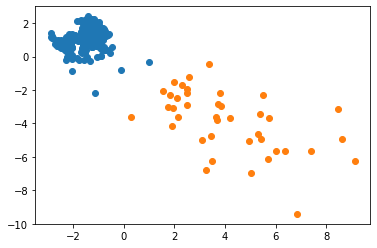

In [28]:
# Plotting the first two clusters to demonstrate how the clusters look
import matplotlib.pyplot as plt
pca_2d = pca.transform(X)
#filter rows of original data
filtered_label0 = pca_2d[label == 0]
filtered_label1 = pca_2d[label == 1]
#filtered_label2 = pca_2d[label == 2]
#filtered_label3 = pca_2d[label == 3]
#filtered_label4 = pca_2d[label == 4]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1])
#plt.scatter(filtered_label2[:,0] , filtered_label2[:,1])
#plt.scatter(filtered_label3[:,0] , filtered_label3[:,1])
#plt.scatter(filtered_label4[:,0] , filtered_label4[:,1])
plt.show()

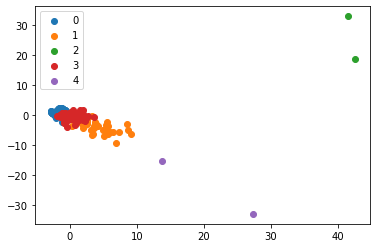

In [30]:
#Getting unique labels
u_labels = np.unique(label)
 
#plotting all the clusters
 
for i in u_labels:
    plt.scatter(pca_2d[label == i , 0] , pca_2d[label == i , 1] , label = i)
plt.legend()
#plt.xlim(-10, 50)
#plt.ylim(-10, 50)
plt.show()

### Observation 3: By running unsupervised clustering on patient's baseline characteristics among 400 participants I identified 5 novel CKD subgroups that best represent the data pattern. But cluster marked 0,1 and 3 show more probability of being subgroups due to the high count of point distribution.

### Let's identify the centroids in order to find dominating features within clusters so we know what factors are dominating the subtypes of CKD

In [31]:
features = X.columns.tolist()
print(f"Features: \n{features}")

centroids = kmeans.cluster_centers_
print(f"Centroids \n{centroids}")

Features: 
['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Centroids 
[[-4.75102787e-01 -8.14070352e-01  1.85929648e-01  1.33165829e-01
   3.51758794e-02 -3.51758794e-02 -2.51256281e-02  1.00502513e-02
   1.00502513e-02 -2.07773562e-01 -2.54582264e-01 -1.36573277e-01
   4.61474037e-01 -1.18090452e-01  4.87638191e-01  4.69346734e-01
  -1.02367508e-01  7.42043551e-01  6.03015075e-02  5.52763819e-02
  -1.80411242e-16  5.02512563e-02  5.52763819e-02  2.01005025e-02]
 [ 1.51515152e-02  5.00000000e-01 -9.76190476e-01  9.28571429e-01
   6.19047619e-01 -3.33333333e-01 -4.52380952e-01  1.66666667e-01
   1.19047619e-01  4.49465500e-01  3.15039397e+00  5.16373125e+00
  -1.18650794e+00  4.01785714e-01 -1.01460317e+00 -1.20476190e+00
   1.31566028e-01 -1.87698413e+00  7.61904762e-01  6.66666667e-01
   2.14285714e-01  4.04761905e-01  5.00000000e-01  5.95238095e-01]
 [ 2.04545455e-01  5

In [32]:
sorted_centroid_features_idx = centroids.argsort(axis=1)[:,::-1]
print(f"Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: {sorted_centroid_features_idx}")

print()

sorted_centroid_features_values = np.take_along_axis(centroids, sorted_centroid_features_idx, axis=1)
print(f"Sorted Feature/Dimension Values for Each Centroid in Descending Order: {sorted_centroid_features_values}")

Sorted Feature/Dimension Indexes for Each Centroid in Descending Order: [[17 14 15 12  2  3 18 22 19 21  4 23  8  7 20  6  5 16 13 11  9 10  0  1]
 [11 10  3 18 19  4 23  1 22  9 21 13 20  7 16  8  0  5  6  2 14 12 15 17]
 [13 11 10  4  9 12  3  1 22 23 18 19  0  8  7  5 20 21 14 16 15  6  2 17]
 [ 9  4  3 18 11 19 10 16 21 22  7  0 23 20  8  1 13  5 12  6 14 15 17  2]
 [11 10 18  9 21 20 19  0 13 22  8  7  6  5  4  3  2 23 14 16 15  1 17 12]]

Sorted Feature/Dimension Values for Each Centroid in Descending Order: [[ 7.42043551e-01  4.87638191e-01  4.69346734e-01  4.61474037e-01
   1.85929648e-01  1.33165829e-01  6.03015075e-02  5.52763819e-02
   5.52763819e-02  5.02512563e-02  3.51758794e-02  2.01005025e-02
   1.00502513e-02  1.00502513e-02 -1.80411242e-16 -2.51256281e-02
  -3.51758794e-02 -1.02367508e-01 -1.18090452e-01 -1.36573277e-01
  -2.07773562e-01 -2.54582264e-01 -4.75102787e-01 -8.14070352e-01]
 [ 5.16373125e+00  3.15039397e+00  9.28571429e-01  7.61904762e-01
   6.66666667e-01

In [33]:
#Feature analysis for Cluster marked 0
first_features_in_centroid_1 = centroids[0][sorted_centroid_features_idx[0]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[0]], 
            first_features_in_centroid_1
        )
    ))

[('rbcc', 0.742043551088778), ('hemo', 0.48763819095477423), ('pcv', 0.46934673366834156), ('sod', 0.4614740368509217), ('sg', 0.18592964824119107), ('al', 0.13316582914572778), ('htn', 0.06030150753768865), ('pe', 0.05527638190954745), ('dm', 0.055276381909547256), ('appet', 0.05025125628140756), ('su', 0.03517587939698419), ('ane', 0.02010050251256293), ('ba', 0.010050251256281478), ('pcc', 0.010050251256281187), ('cad', -1.8041124150158794e-16), ('pc', -0.025125628140703182), ('rbc', -0.03517587939698506), ('wbcc', -0.10236750764129927), ('pot', -0.11809045226130657), ('sc', -0.13657327734563296), ('bgr', -0.20777356168598093), ('bu', -0.2545822638371713), ('age', -0.4751027866605756), ('bp', -0.8140703517587933)]


#### Conclusion: Cluster labelled "0" identifies with high valued features like red blood cells, hemoglobin, packed cell volume, sodium.

In [34]:
#Feature analysis for Cluster marked 1
first_features_in_centroid_2 = centroids[1][sorted_centroid_features_idx[1]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[1]], 
            first_features_in_centroid_2
        )
    ))

[('sc', 5.163731245923025), ('bu', 3.150393970537856), ('al', 0.9285714285714288), ('htn', 0.7619047619047621), ('dm', 0.6666666666666667), ('su', 0.6190476190476192), ('ane', 0.5952380952380952), ('bp', 0.5000000000000003), ('pe', 0.5000000000000002), ('bgr', 0.4494655004859086), ('appet', 0.4047619047619047), ('pot', 0.40178571428571386), ('cad', 0.2142857142857143), ('pcc', 0.16666666666666669), ('wbcc', 0.13156602847324492), ('ba', 0.11904761904761904), ('age', 0.015151515151515138), ('rbc', -0.3333333333333335), ('pc', -0.4523809523809525), ('sg', -0.9761904761904636), ('hemo', -1.0146031746031743), ('sod', -1.186507936507936), ('pcv', -1.2047619047619045), ('rbcc', -1.8769841269841283)]


#### Conclusion: Cluster labelled "1" identifies with high valued features like serum creatinine, blood urea, albumin, hypertension,diabetes melitus, sugar,anemia, blood pressure, pedal adema, blood glucose random, appetite,potassium,coronary artery disease.

In [35]:
#Feature analysis for Cluster marked 2
first_features_in_centroid_3 = centroids[2][sorted_centroid_features_idx[2]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[2]], 
            first_features_in_centroid_3
        )
    ))

[('pot', 48.250000000000014), ('sc', 9.589041095890408), ('bu', 6.805755395683453), ('su', 3.0), ('bgr', 1.6734693877551021), ('sod', 1.6666666666666667), ('al', 1.25), ('bp', 0.5), ('pe', 0.5), ('ane', 0.5), ('htn', 0.5), ('dm', 0.5), ('age', 0.20454545454545456), ('ba', 0.0), ('pcc', 0.0), ('rbc', 0.0), ('cad', 0.0), ('appet', 0.0), ('hemo', -0.6066666666666666), ('wbcc', -0.6185567010309279), ('pcv', -0.85), ('pc', -1.0), ('sg', -1.4999999999999778), ('rbcc', -1.5833333333333341)]


#### Conclusion: Cluster labelled "2" identifies with high valued features like potassium, serum creatinine, blood urea,sugar, blood glucose random,sodium, albumin,blood pressure,pedal adema, anemia,hypertension,diabetes mellitus, age.

In [36]:
#Feature analysis for Cluster marked 3
first_features_in_centroid_4 = centroids[3][sorted_centroid_features_idx[3]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[3]], 
            first_features_in_centroid_4
        )
    ))

[('bgr', 1.384068466096116), ('su', 0.7677419354838697), ('al', 0.7225806451612901), ('htn', 0.6451612903225808), ('sc', 0.6227132125497126), ('dm', 0.6193548387096768), ('bu', 0.4538779299141332), ('wbcc', 0.42620552045227816), ('appet', 0.3483870967741943), ('pe', 0.27741935483870994), ('pcc', 0.2129032258064512), ('age', 0.19442815249266862), ('ane', 0.19354838709677405), ('cad', 0.1548387096774193), ('ba', 0.09677419354838712), ('bp', 0.025806451612903902), ('pot', -0.008064516129032612), ('rbc', -0.16774193548387106), ('sod', -0.30752688172042986), ('pc', -0.32258064516129037), ('hemo', -0.41427956989247294), ('pcv', -0.49677419354838726), ('rbcc', -0.6784946236559138), ('sg', -1.1354838709677262)]


#### Conclusion: Cluster labelled "3" identifies with high valued features like blood glucose random,sugar,albumin,hypertension,serum creatinine, diabetes mellitus, blood urea, white blood cells count,appetite.

In [37]:
#Feature analysis for Cluster marked 4
first_features_in_centroid_5 = centroids[4][sorted_centroid_features_idx[4]]
print(list(
        zip(
            [features[feature] for feature in sorted_centroid_features_idx[4]], 
            first_features_in_centroid_5
        )
    ))

[('sc', 33.287671232876704), ('bu', 1.7553956834532376), ('htn', 1.0), ('bgr', 0.5102040816326531), ('appet', 0.5), ('cad', 0.5), ('dm', 0.5), ('age', 0.43181818181818177), ('pot', 0.0), ('pe', 0.0), ('ba', 0.0), ('pcc', 0.0), ('pc', 0.0), ('rbc', 0.0), ('su', 0.0), ('al', 0.0), ('sg', 0.0), ('ane', 0.0), ('hemo', -0.23333333333333306), ('wbcc', -0.3711340206185567), ('pcv', -0.4), ('bp', -0.5), ('rbcc', -1.0000000000000004), ('sod', -11.125)]


#### Conclusion: Cluster labelled "4" identifies with high valued features like serum creatinine, blood urea,hypertension, blood glucose random,appetite, coronary artery disease,diabetes and age.